#**Marketing A/B Testing**

**About Datase**t

Marketing companies want to run successful campaigns, but the market is complex and several options can work. So normally they run A/B tests, that is a randomized experimentation process wherein two or more versions of a variable (web page, page element, banner, etc.) are shown to different segments of people at the same time to determine which version leaves the maximum impact and drive business metrics.

**The companies are interested in answering two questions:**

1. Would the campaign be successful?
2. If the campaign was successful, how much of that success could be attributed to the ads?

With the second question in mind, we normally do an A/B test. The majority of the people will be exposed to ads (the experimental group). And a small portion of people (the control group) would instead see a Public Service Announcement (PSA) (or nothing) in the exact size and place the ad would normally be.

The idea of the dataset is to analyze the groups, find if the ads were successful, how much the company can make from the ads, and if the difference between the groups is statistically significant.

**Data dictionary:**

1. Index: Row index
2. user id: User ID (unique)
3. test group: If "ad" the person saw the advertisement, if "psa" they only saw .the public service announcement
4. converted: If a person bought the product then True, else is False
5. total ads: Amount of ads seen by person
6. most ads day: Day that the person saw the biggest amount of ads
7. most ads hour: Hour of day that the person saw the biggest amount of ads

In [73]:
#importing necessary library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#**Importing the dataset**

In [74]:
df= pd.read_csv("/content/marketing_AB.csv")

In [75]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


#**Assessing Data**

In [76]:
df.columns

Index(['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads',
       'most ads day', 'most ads hour'],
      dtype='object')

In [77]:
df.shape

(588101, 7)

In [78]:
#information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [79]:
df.nunique()

Unnamed: 0       588101
user id          588101
test group            2
converted             2
total ads           807
most ads day          7
most ads hour        24
dtype: int64

In [80]:
#description of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,588101.0,2.940500e+05,169770.279668,0.0,147025.0,294050.0,441075.0,588100.0
user id,588101.0,1.310692e+06,202225.983128,900000.0,1143190.0,1313725.0,1484088.0,1654483.0
total ads,588101.0,2.482088e+01,43.715181,1.0,4.0,13.0,27.0,2065.0
most ads hour,588101.0,1.446906e+01,4.834634,0.0,11.0,14.0,18.0,23.0


In [81]:
#checking duplicate data
df.duplicated().sum()

0

In [82]:
#checking null values
df.isnull().sum()

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

#**Data Cleaning**

In [83]:
df.dropna(inplace=True)

In [84]:
#dropping the columns named'Unnamed: 0'
df.drop(columns={"Unnamed: 0"},inplace=True)

In [85]:
df.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)
df.head(1)

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,1069124,ad,False,130,Monday,20


In [86]:
#convert most_ads_hour into category
df['most_ads_hour'] = df['most_ads_hour'].astype('category')

In [87]:
df.dtypes

user_id             int64
test_group         object
converted            bool
total_ads           int64
most_ads_day       object
most_ads_hour    category
dtype: object

In [88]:
df["converted_int"]=df['converted'].apply(lambda x:1 if x==True else 0)
df['converted_int'].mean()*100

2.523886203220195

In [89]:
df.head()

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour,converted_int
0,1069124,ad,False,130,Monday,20,0
1,1119715,ad,False,93,Tuesday,22,0
2,1144181,ad,False,21,Tuesday,18,0
3,1435133,ad,False,355,Tuesday,10,0
4,1015700,ad,False,276,Friday,14,0


#**Exploratory Data Analysis**

**Univariate Analysis**

In [90]:
df['converted'].value_counts()/len(df)*100

converted
False    97.476114
True      2.523886
Name: count, dtype: float64

4% converted

In [91]:
df["test_group"].value_counts()/len(df)*100

test_group
ad     96.000007
psa     3.999993
Name: count, dtype: float64

In [92]:
df['most_ads_day'].value_counts()/len(df)*100

most_ads_day
Friday       15.746955
Monday       14.805790
Sunday       14.519785
Thursday     14.110161
Saturday     13.885370
Wednesday    13.757501
Tuesday      13.174438
Name: count, dtype: float64

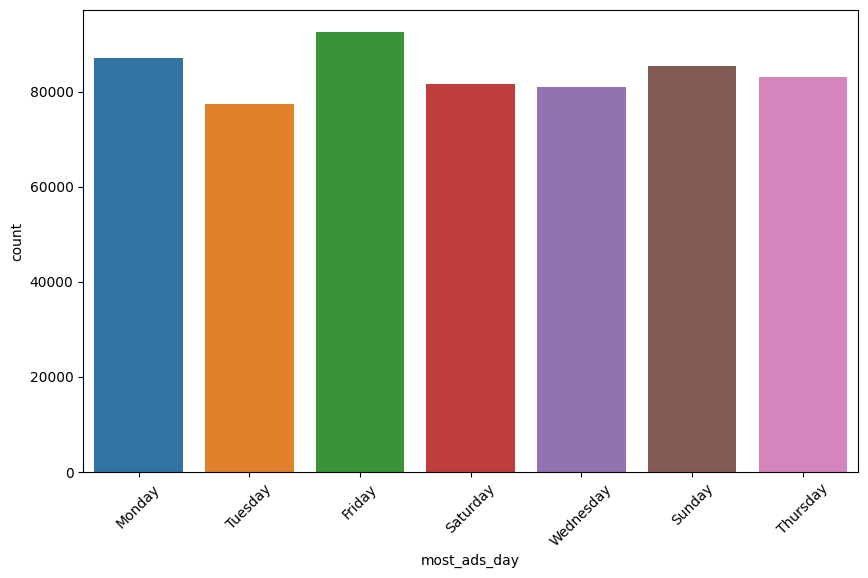

In [93]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x="most_ads_day",hue="most_ads_day")
plt.xticks(rotation=45)
plt.show()

most ads are shown on friday

In [94]:
df['total_ads'].describe().T

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total_ads, dtype: float64

we have outliers in total_ads

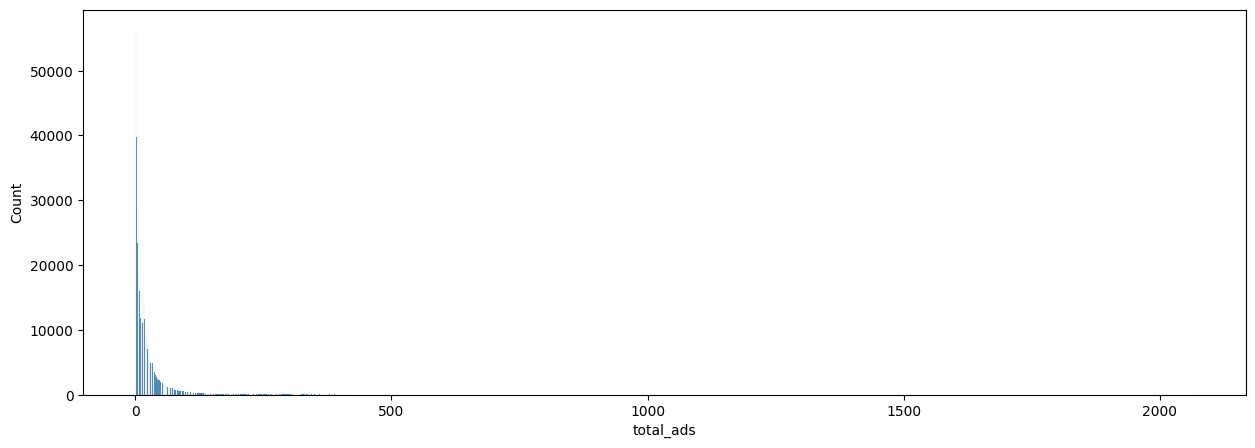

In [95]:
plt.figure(figsize=(15,5))
sns.histplot(data=df,x="total_ads")
plt.show()

most ads are shown below 50

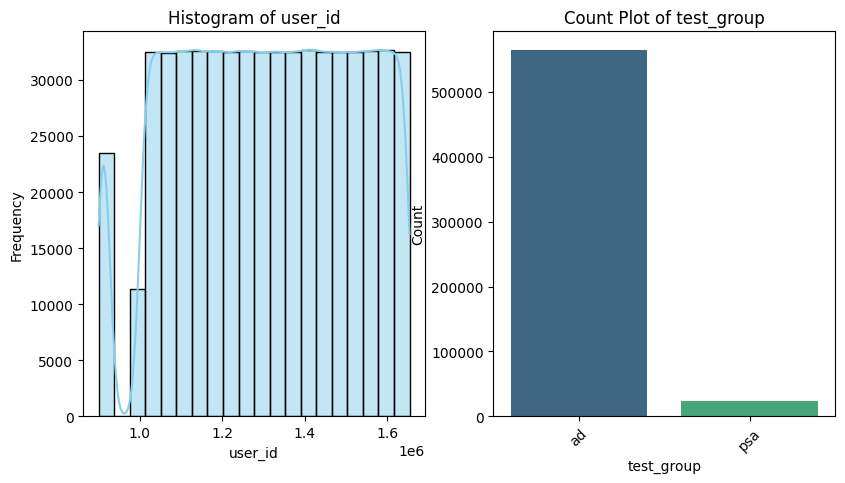

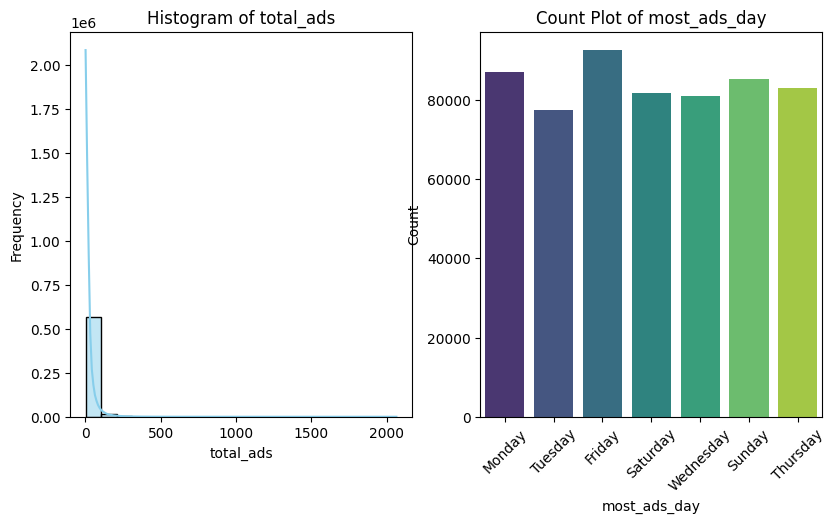

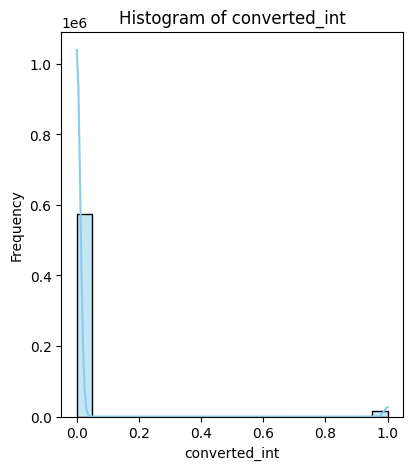

In [96]:
for col in df.columns:
  if df[col].dtype in ['int64','float64']:
    plt.figure(figsize=(15,5))
    plt.subplot(131)
    sns.histplot(df[col], bins=20, kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
  elif df[col].dtype == 'object':
        # Plot count plot using seaborn
        plt.subplot(132)
        sns.countplot(data=df, x=col, palette='viridis')
        plt.title(f'Count Plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

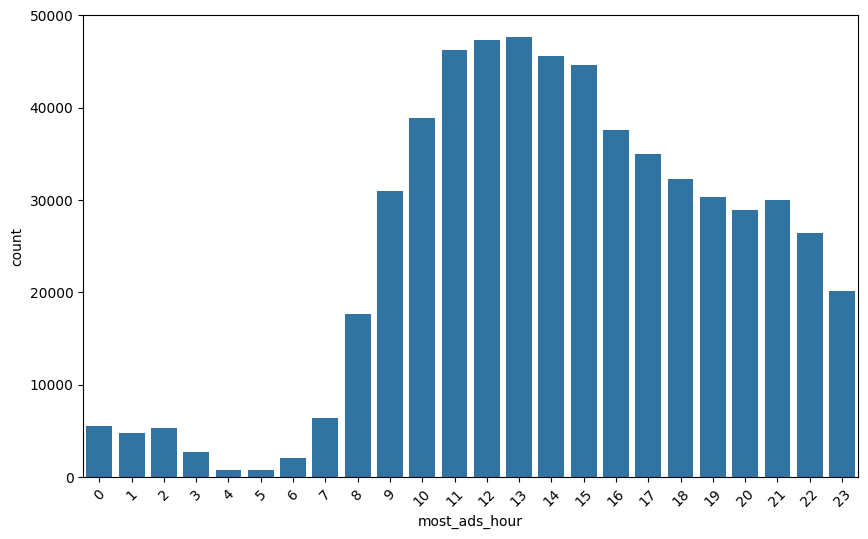

In [97]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x="most_ads_hour")
plt.xticks(rotation=45)
plt.show()

12 and 13 times hour more ads are shown

In [98]:
df['most_ads_hour'].value_counts()/len(df)*100

most_ads_hour
13    8.103200
12    8.042496
11    7.857494
14    7.761932
15    7.597845
10    6.621142
16    6.387848
17    5.949318
18    5.496165
9     5.271884
19    5.161018
21    5.097084
20    4.918033
22    4.494466
23    3.429003
8     2.997274
7     1.089099
0     0.941335
2     0.906817
1     0.816526
3     0.455534
6     0.351640
5     0.130080
4     0.122768
Name: count, dtype: float64

**Bivariate analysis**

In [99]:
pd.crosstab(index=df['test_group'],columns=df['converted'],normalize=True)*100

converted,False,True
test_group,,
ad,93.547537,2.452470
psa,3.928577,0.071416


**person who has seen ad is more likely to be converted than who have seen in psa**

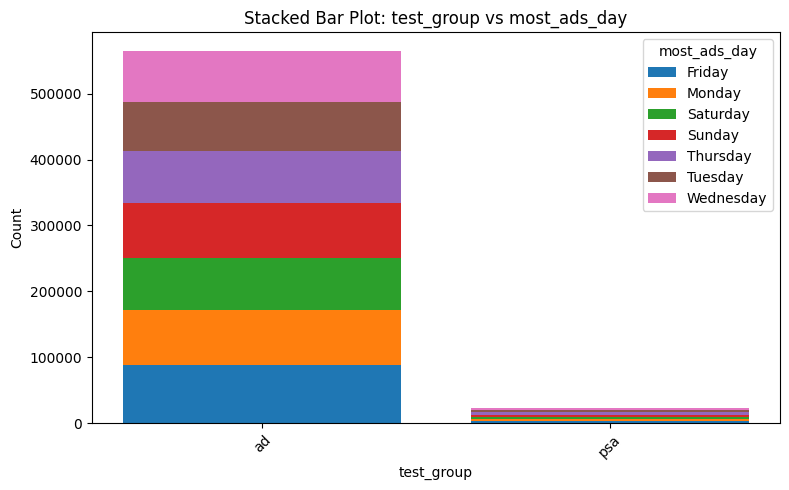

In [100]:
# Get the names of categorical variables from df.columns
categorical_variables = df.select_dtypes(include='object').columns.tolist()

for i in range(len(categorical_variables)):
    for j in range(i+1, len(categorical_variables)):
        plt.figure(figsize=(8,5))

        # Crosstabulation for count
        cross_tab = pd.crosstab(df[categorical_variables[i]], df[categorical_variables[j]])

        # Stacked Bar Plot
        plt.bar(cross_tab.index, cross_tab.iloc[:, 0], label=cross_tab.columns[0])
        bottom = cross_tab.iloc[:, 0]
        for col in cross_tab.columns[1:]:
            plt.bar(cross_tab.index, cross_tab[col], bottom=bottom, label=col)
            bottom += cross_tab[col]

        plt.title(f'Stacked Bar Plot: {categorical_variables[i]} vs {categorical_variables[j]}')
        plt.xlabel(categorical_variables[i])
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.legend(title=categorical_variables[j])

        plt.tight_layout()
        plt.show()

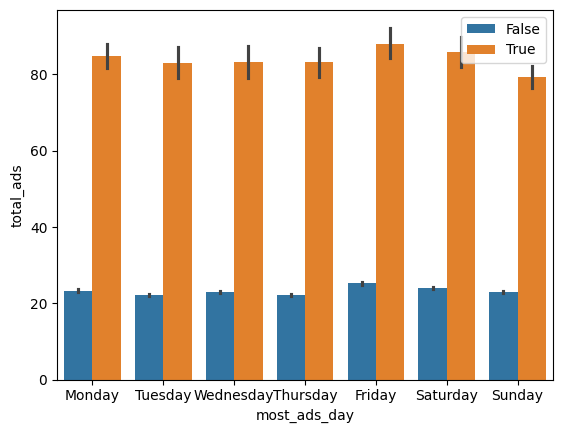

In [101]:
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.barplot(data=df,x="most_ads_day",y="total_ads",hue="converted",order=days_order)
plt.legend(loc="upper right")
plt.show()

In [102]:
pd.crosstab(index=df['most_ads_day'],columns=df['converted'],normalize=True)*100

converted,False,True
most_ads_day,,
Friday,15.397185,0.349770
Monday,14.319989,0.485801
Saturday,13.593073,0.292297
Sunday,14.164404,0.355381
Thursday,13.805792,0.304369
Tuesday,12.781308,0.393130
Wednesday,13.414362,0.343138


In [103]:
# Assuming df is your DataFrame containing the data
cross_tab = pd.crosstab(index=df['most_ads_hour'], columns=df['converted'], normalize=True) * 100

# Sort the DataFrame based on the boolean column names (False and True)
cross_tab_sorted = cross_tab.sort_values(by=True, ascending=False)

print(cross_tab_sorted)

converted         False     True 
most_ads_hour                    
15             7.372543  0.225301
14             7.544112  0.217820
13             7.903234  0.199966
16             6.191283  0.196565
12             7.850862  0.191634
11             7.683714  0.173780
17             5.781490  0.167828
18             5.345680  0.150484
21             4.949660  0.147424
20             4.771459  0.146573
10             6.478649  0.142493
19             5.023117  0.137901
22             4.377139  0.117327
9              5.170710  0.101173
23             3.351295  0.077708
8              2.938781  0.058493
7              1.069374  0.019725
0              0.923991  0.017344
1              0.805984  0.010542
6              0.343818  0.007822
2              0.900186  0.006632
3              0.450773  0.004761
5              0.127359  0.002721
4              0.120898  0.001870


In [104]:
df.groupby("converted_int").total_ads.agg(["count","median","std","max"])

,count,median,std,max
converted_int,,,,
0,573258,13.0,40.863176,2065
1,14843,64.0,87.455498,1778


In [105]:
df.head()

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour,converted_int
0,1069124,ad,False,130,Monday,20,0
1,1119715,ad,False,93,Tuesday,22,0
2,1144181,ad,False,21,Tuesday,18,0
3,1435133,ad,False,355,Tuesday,10,0
4,1015700,ad,False,276,Friday,14,0


<Axes: xlabel='converted', ylabel='total_ads'>

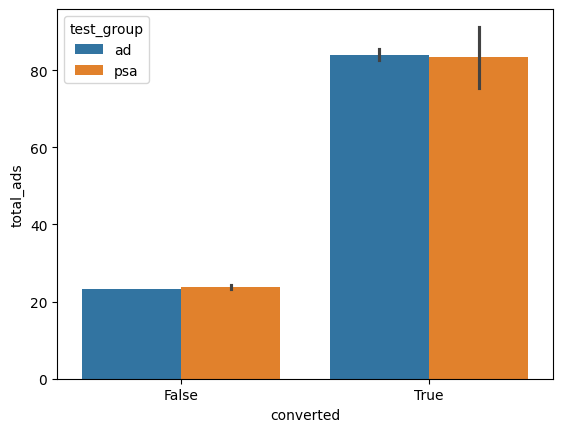

In [106]:
sns.barplot(data=df,x="converted",y="total_ads",hue="test_group")

<Axes: xlabel='converted', ylabel='total_ads'>

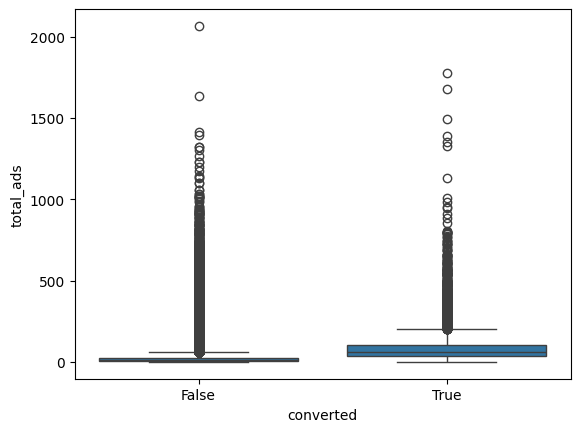

In [107]:
sns.boxplot(data=df,x="converted",y="total_ads")

In [108]:
print("total ads percentile information:\n",df['total_ads'].describe(percentiles=[0.25, 0.50, 0.75, 0.80, 0.85, 0.95, 0.99]))

total ads percentile information:
 count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
80%          33.000000
85%          42.000000
95%          88.000000
99%         202.000000
max        2065.000000
Name: total_ads, dtype: float64


**we can see that 95% of total_ads contains less than or equal to 88**

<Axes: xlabel='converted', ylabel='total_ads'>

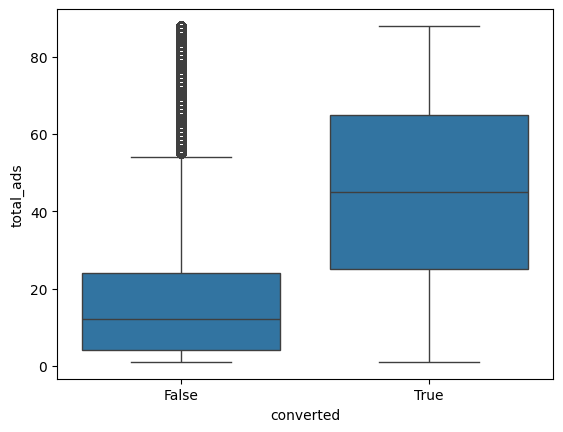

In [109]:
sns.boxplot(data=df[df["total_ads"]<=88],x="converted",y="total_ads")

#**Statistical Test**

In [110]:
df.head()

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour,converted_int
0,1069124,ad,False,130,Monday,20,0
1,1119715,ad,False,93,Tuesday,22,0
2,1144181,ad,False,21,Tuesday,18,0
3,1435133,ad,False,355,Tuesday,10,0
4,1015700,ad,False,276,Friday,14,0


**chi-square test of independence to determine if there is a significant association between the 'test_group' and 'converted' variables.**

In [111]:
from scipy.stats import chi2_contingency

In [112]:
contingency_table=pd.crosstab(df["test_group"],df["converted"])

In [113]:
print(contingency_table)

converted    False  True 
test_group               
ad          550154  14423
psa          23104    420


In [114]:
chi2_stat,p_val,dof,expected=chi2_contingency(contingency_table)

In [115]:
# Print the results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 54.005823883685245
P-value: 1.9989623063390075e-13
Degrees of freedom: 1
Expected frequencies table:
[[550327.71899045  14249.28100955]
 [ 22930.28100955    593.71899045]]


In [116]:
# Compare the p-value to the significance level (e.g., 0.05)
if p_val<0.05:
  print("Reject Null hypothesis :There is a significant association between test_group and conversion.")
else:
  print("Fail to reject null hypothesis: There is no significant association between test_group and conversion.")

Reject Null hypothesis :There is a significant association between test_group and conversion.


When we reject the null hypothesis in a chi-square test of independence, it means that there is evidence to suggest that there is a significant association between the two categorical variables being tested (in this case, 'test_group' and 'converted').

In the context of your data, rejecting the null hypothesis "There is no significant association between test_group and conversion" implies that there is a relationship or association between the test group a user belongs to and whether they converted or not.

Here's what it means in practical terms:

Significant Association:

The test suggests that there is a non-random relationship between the 'test_group' and 'converted' variables.
This could imply that the test group a user belongs to influences whether they convert or not, or vice versa.
Possible Implications:

For example, if your 'test_group' represents different versions of a website or different marketing strategies, rejecting the null hypothesis suggests that these variations have an impact on conversion rates.
This could be valuable information for decision-making in marketing campaigns, website design, or product development.
Further Analysis:

You may want to investigate the nature of the association further. For example, you could explore which specific test groups have higher conversion rates or whether certain factors contribute to differences in conversion rates among the test groups.
Consideration:

However, it's important to remember that rejecting the null hypothesis doesn't necessarily imply causation. It only indicates that there is a statistically significant association between the variables. Further research or experimentation may be needed to establish causality.
Overall, rejecting the null hypothesis in a chi-square test provides evidence that there is a meaningful relationship between the categorical variables under study, which can inform decision-making and further analysis.

**T-Test between test_group and converted_int**

In [117]:
df["test_group"].value_counts()

test_group
ad     564577
psa     23524
Name: count, dtype: int64

In [118]:
from scipy.stats import ttest_ind

In [119]:
# Separate the data into two groups based on a categorical variable (e.g., 'test_group')
group1=df[df['test_group'] == 'ad']['converted_int']
group2=df[df['test_group'] =='psa']['converted_int']

In [120]:
df[df['test_group'] =='psa']['converted']

18        False
38        False
68        False
140       False
157       False
          ...  
588052    False
588063    False
588066    False
588069    False
588081    False
Name: converted, Length: 23524, dtype: bool

In [121]:
# Perform independent samples t-test
t_statistic, p_value = ttest_ind(group1, group2)

In [122]:
# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 7.37040597428566
P-value: 1.7033052627831264e-13


In [123]:
if p_value<0.05:
  print("reject null hypothesis! there is significant difference between the groups")
else:
  print("fail to reject null hypothesis! There is no significant difference between the groups.")

reject null hypothesis! there is significant difference between the groups


**When the null hypothesis is rejected in a t-test, it means that there is evidence to suggest that there is a significant difference between the means of the two groups being compared**

 Here's how you can interpret this result:

1. Significant Difference:

Rejecting the null hypothesis indicates that there is a statistically significant difference between the two groups.
In your case, since you're comparing the conversion rates (or whatever the converted_int variable represents) between two groups, it suggests that the mean conversion rate differs significantly between the 'ad' group and the 'psa' group.
2. Practical Significance:

While statistical significance indicates that the observed difference is unlikely to have occurred by chance alone, it's also important to consider the practical significance.
Evaluate whether the observed difference is large enough to be meaningful in the context of your research or practical application.
3. Possible Factors:

Consider possible factors that might explain the observed difference. These could include differences in the experimental conditions, audience demographics, or other variables that may influence the outcome being measured.
4. Further Analysis:

If the difference is meaningful, further analysis may be warranted to understand the underlying reasons for the difference and to explore potential implications.
You may want to investigate which specific factors contribute to the observed difference and how these insights can inform decision-making or future research.
5. Cautions:

Keep in mind that rejecting the null hypothesis does not necessarily imply causation. It only indicates that there is a significant statistical difference between the groups. Additional research or experimentation may be needed to establish causality.
Overall, rejecting the null hypothesis suggests that there is a meaningful difference between the groups being compared, which may have important implications for your research or practical application.

**comparing all the categorical variable with chi square test**

In [125]:
df_cat=df.select_dtypes(include=["object","bool","category"])
df_cat.head()

,test_group,converted,most_ads_day,most_ads_hour
0,ad,False,Monday,20
1,ad,False,Tuesday,22
2,ad,False,Tuesday,18
3,ad,False,Tuesday,10
4,ad,False,Friday,14


In [126]:
from scipy.stats import chi2_contingency

for variable in df_cat.columns:
  if variable!="converted":

    #create contigency table
    contingency_table = pd.crosstab(df_cat[variable],df_cat['converted'])
    chi2,p,_,_ = chi2_contingency(contingency_table)

    #display the results
    print(f"\n chi square test for {variable} vs convered:")
    print(f"chi square value:{chi2}")
    print(f"p-value:{p}")

    #check for significane
    if p<0.05:
      print(f"Reject Null hypothesis! there is a difference in {variable} and converted")
    else:
      print(f"there is no significant difference in conversion rates across {variable}")


 chi square test for test_group vs convered:
chi square value:54.005823883685245
p-value:1.9989623063390075e-13
Reject Null hypothesis! there is a difference in test_group and converted

 chi square test for most_ads_day vs convered:
chi square value:410.0478857936585
p-value:1.932184379244731e-85
Reject Null hypothesis! there is a difference in most_ads_day and converted

 chi square test for most_ads_hour vs convered:
chi square value:430.76869230822086
p-value:8.027629823696771e-77
Reject Null hypothesis! there is a difference in most_ads_hour and converted


In [127]:
df.head()

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour,converted_int
0,1069124,ad,False,130,Monday,20,0
1,1119715,ad,False,93,Tuesday,22,0
2,1144181,ad,False,21,Tuesday,18,0
3,1435133,ad,False,355,Tuesday,10,0
4,1015700,ad,False,276,Friday,14,0


**Performing the test between Numerical Columns and Converted Columns**

In [128]:
from scipy.stats import shapiro, levene,ttest_ind,mannwhitneyu

In [130]:
#normality assumptions
shapiro_stat_true,shapiro_p_value_true = shapiro(df[df['converted']==True]['total_ads'])
shapiro_stat_false,shapiro_p_value_false = shapiro(df[df['converted']==False]['total_ads'])

In [133]:
print(f"shapiro wilk test for normality(true_group):p-value=",{shapiro_p_value_true})
print(f"shapiro wilk test for normality(False_group):p-value=",{shapiro_p_value_false})

shapiro wilk test for normality(true_group):p-value= {0.0}
shapiro wilk test for normality(False_group):p-value= {0.0}


The interpretation of a p-value of 0.0 is that it is less than any reasonable significance level (e.g., 0.05), indicating strong evidence against the null hypothesis. In other words, it suggests that the data are not normally distributed.

In [135]:
#equality of variance assumption
levene_stat,levene_p_value = levene(df[df['converted']]['total_ads'],df[~df['converted']]['total_ads'])
print("Levene's test for equality of variances:p-value",levene_p_value)

Levene's test for equality of variances:p-value 0.0


since the p-value is less than any reasonable significance level (e.g., 0.05), we reject the null hypothesis.
Rejecting the null hypothesis suggests that the variances are not equal across the groups.

**The Mann-Whitney U test, also known as the Mann-Whitney-Wilcoxon test or Wilcoxon rank-sum test, is a non-parametric statistical test used to assess whether two independent samples come from populations with the same distribution or not. It's an alternative to the independent samples t-test when the assumption of normality is violated or when the data are ordinal or skewed.**

In [139]:
from scipy.stats import mannwhitneyu

g1=df[df['converted']]['total_ads']
g2=df[~df['converted']]['total_ads']
# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(g1, g2)

# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

# Compare the p-value to the significance level (e.g., 0.05)
if p_value < 0.05:
    print("Reject null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject null hypothesis: There is no significant difference between the groups.")

Mann-Whitney U statistic: 7269106736.0
P-value: 0.0
Reject null hypothesis: There is a significant difference between the groups.


**The conclusion "There is a significant difference between the groups" means that the Mann-Whitney U test has provided evidence that there is a meaningful difference in the distribution of the variable between the two groups being compared.**